# Asignment: Fourier series
The first of the two assignments from our subject "Function of complex variable and integral transformation" is to construct a Fourrier series. We were given a free hand regarding the software to use for calculations and visualisations. I chose jupyter notebooks with python, since I had already some experience with them on Kaggle and I still dont understand how can the pros of MATLAB outweigh the giant con in the form in the pricing

In [13]:
from scipy import integrate
import numpy as np, matplotlib.pyplot as plt, scipy as sci
import math

### Let T = 5 and let f be such a T-periodic function that:
$$
f(t) = \left\{
        \begin{array}{ll}
            e^{-2t}-1 & \quad t \in \langle 0,1) \\
            2, & \quad t \in \langle 1,5)
        \end{array}
    \right.
$$

First we must ascertain that the function is a square-integrable function, that is to make sure that:
$$
\int_0^T f^2(t) dt < \infty
$$
which in turns into:
$$
\int_0^1 (e^{-2t}-1)^2 dt + \int_1^5 2^2 dt < \infty
$$


In [14]:
left_side = (float(integrate.quad(lambda t: (np.exp(-2*t)-1)**2, 0,1)[0]) + float(integrate.quad(lambda t: 2**2,1,5)[0]))
print(left_side)

16.38075637351443


which finally gives:
$$
16.38 < \infty
$$
which holds

## 1) Obtain the Fourier series of function f(t)
The formula for Fourier series in R is
$$
f(t) = \frac{a_0}{2} + \displaystyle\sum_{n=1} ^{\infty}( a_n cos(n \omega t) + b_n sin(n \omega t))
$$
where 
$$
a_0 = \frac{2}{T} \int_0^T f(t) dt \\
a_n = \frac{2}{T} \int_0^T f(t)\cos(n \omega t) dt\\
b_n = \frac{2}{T} \int_0^T f(t)\sin(n \omega t) dt\\
$$

then a_0 is:
$$
a_0 = \frac{2}{T} \int_0^T f(t) dt = \frac{2}{5} (\int_0^1 e^{-2t}-1 dt + \int_1^5 2 dt) = 2,97
$$


In [15]:
T = 5 # period 
omega = 2 * sci.pi / T  #angular frequency
N = 3   #number of elements to sum over
t = np.arange(0,14,0.02)

# calculating a_0
a_0 = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1), 0,1)[0]) + float(integrate.quad(lambda t: 2,1,5)[0]))
print(a_0)

2.972932943352678


and a_n and b_n are:

In [16]:
a = []
b = []

#calculating a_n and b_n for N elements
for n in range(1,N):
    a_n  = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.cos(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.cos(n*omega*t),1,5)[0]))   # calculating a_1
    a.append(a_n)
    b_n = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.sin(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.sin(n*omega*t),1,5)[0]))    # calculating b_1
    b.append(b_n)

def recursive_fourier(t, n=N-1):    # recursively summing over all elements
    if int(n)==1:
        return a[n-1]*np.cos(omega*t*n)+b[n-1]*np.sin(omega*t*n)
    else:
        return (recursive_fourier(t, n-1) + a[n-1]*np.cos(omega*t*n)+b[n-1]*np.sin(omega*t*n))
    

## 2) Obtain Fourier sine series of function f(t) on the interval (0,T)
When the function is od the formula for the Fourier series collapses to
$$
f(t) = \displaystyle\sum_{n=1} ^{\infty}b_n sin(\frac{n \pi t}{l})
$$
where 
$$
b_n = \frac{2}{l} \int_0^l f(t)\sin(n \frac{\pi}{l} t) dt\\
$$
with function f(t) on interval (0,T) we take the interval, equal to the original period T as the new halfperiod T, which is equal to l

In [17]:
L=T
b_sine = []

#calculating b_n for N elements
for n in range(1,N):
    b_n = 2/L * (float(integrate.quad(lambda t: ((np.exp(-2*t)-1)*np.sin(n*np.pi/L*t)), 0,1)[0]) + float(integrate.quad(lambda t: (2*np.sin(n*np.pi/L*t)),1,5)[0]))
    b_sine.append(b_n)

def recursive_sine_fourier(t, n=N-1):   #recursively summing over all elements
    if int(n)==1:
        return b_sine[n-1]*np.sin(t*np.pi/L*n)
    else:
        return (recursive_sine_fourier(t, n-1) + b_sine[n-1]*np.sin(t*np.pi/L*n))

## 3)a Plot the graph of sum of corresponding Fourier series

Text(0, 0.5, 'y')

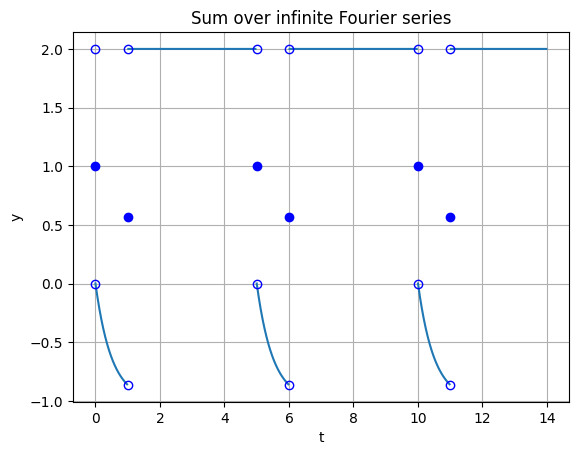

In [18]:
def make_piecewise(t):
    y = np.array([2 if x%5>1 else (np.exp(-2*(x%5))-1) for x in t])
    y[:-1][np.absolute(np.diff(y)) >= 0.8] = np.nan
    return y

# calculating all curves and points
modulo_t = [x%5 if np.isclose(x%5,0) or np.isclose(x%5,1) else np.nan for x in t]
averages_t = t[~np.isnan(modulo_t)]
average_y_points = [np.mean([2,np.exp(-2*(x%5))-1]) for x in averages_t]    #average dots
lower_y_points = [np.exp(-2*(x%5))-1 for x in averages_t]
upper_y_points = [2 for x in averages_t]

#plotting all curves and points
plt.plot(t,make_piecewise(t))   #plotting the original function
plt.plot(averages_t, average_y_points,'bo')
plt.plot(averages_t, lower_y_points,'bo', fillstyle='none')
plt.plot(averages_t, upper_y_points,'bo', fillstyle='none')
plt.title("Sum over infinite Fourier series")
plt.grid()
plt.xlabel("t")
plt.ylabel("y")


Text(0, 0.5, 'y')

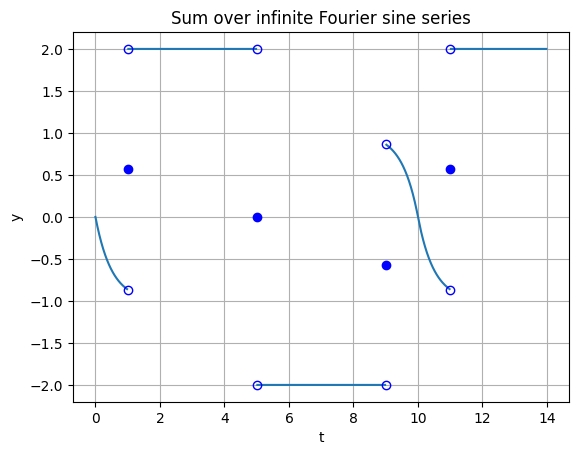

In [19]:
def make_piecewise_odd(t):
    values=[]
    for x in t:
        if x%10<1:
            values.append(np.exp(-2*(x%10))-1)
        elif x%10>1 and x%10<5:
            values.append(2)
        elif x%10>5 and x%10<9:
            values.append(-2)
        elif x%10>9:
            values.append(-(np.exp(-2*((-x)%5))-1))
        else:
            values.append(np.nan)
    return values

def make_averages(t):
    values = []
    for x in t:
        if np.isclose(x%10,1):
            values.append(np.mean([2,np.exp(-2*(x%5))-1]))
        elif np.isclose(x%10,5):
            values.append(0)
        else:
            values.append(np.mean([-(np.exp(-2*((-x)%5))-1),-2]))
    return values

# calculating all curves and points
modulo_t = [x%5 if np.isclose(x%10,1) or np.isclose(x%10,5) or np.isclose(x%10,9) else np.nan for x in t]
averages_t = t[~np.isnan(modulo_t)]
average_y_points = make_averages(averages_t)    #average dots
lower_y_points = [np.exp(-2*(x%5))-1 if np.isclose(x%10,1) else -2 for x in averages_t]
upper_y_points = [2 if not(np.isclose(x%10,9)) else -(np.exp(-2*((-x)%5))-1) for x in averages_t]

#plotting all curves and points
plt.plot(t,make_piecewise_odd(t))  #plotting the original function
plt.plot(averages_t, average_y_points,'bo')
plt.plot(averages_t, lower_y_points,'bo', fillstyle='none')
plt.plot(averages_t, upper_y_points,'bo', fillstyle='none')
plt.title("Sum over infinite Fourier sine series")
plt.grid()
plt.xlabel("t")
plt.ylabel("y")

## b) Plot the graph of the first 3 elements of the corresponding Fourier function

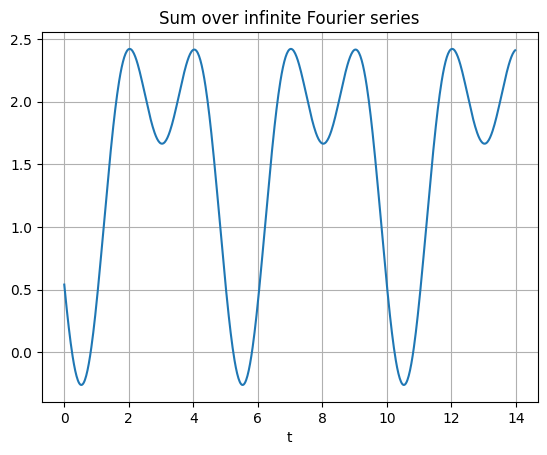

In [20]:
#plotting all curves and points
plt.title("Sum over infinite Fourier series")
plt.grid()
plt.xlabel("t")

#plotting the Fourier
fourier = np.add(list(map(recursive_fourier, t)),a_0/2)
plt.plot(t,fourier)

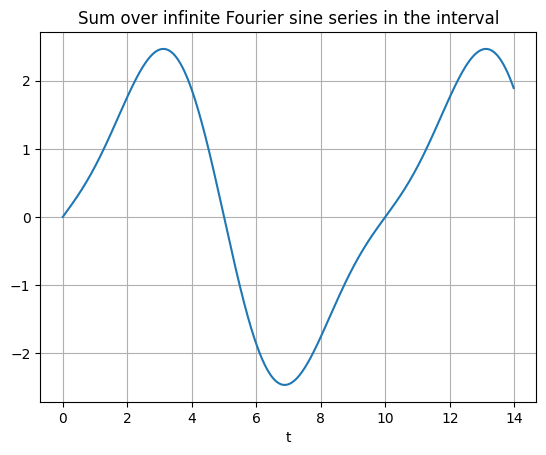

In [24]:
#plotting all curves and points
plt.title("Sum over infinite Fourier sine series in the interval")
plt.grid()
plt.xlabel("t")

#plotting the Fourier sine
f_sine = list(map(recursive_sine_fourier, t))
plt.plot(t,f_sine)

## c) Plot the amplitude and phase spectra of the corresponfing Fourier functions

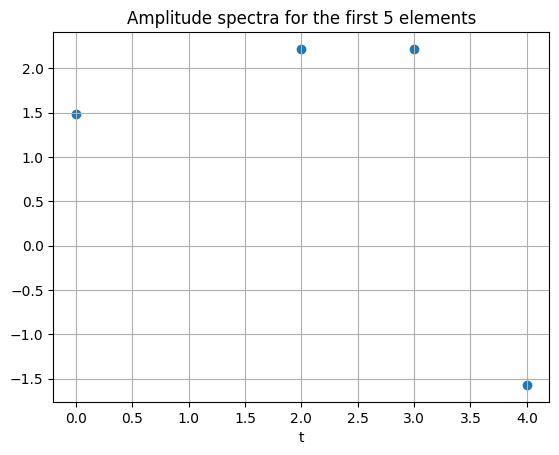

In [22]:
# calculating first five elements of the phase and amplitude spectra
amplitudes = []
phases = []
amplitudes.append(np.abs(a_0/2))
phases.append(np.nan)

for n in range(1,7):
    a_n  = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.cos(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.cos(n*omega*t),1,5)[0]))   # výpočet a_n
    b_n = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.sin(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.sin(n*omega*t),1,5)[0]))    # výpočet b_n
    amplitude = np.sqrt(b_n**2+ a_n**2)
    amplitudes.append(amplitude)
    phase = np.arccos(a_n/amplitude) if b_n<0 else -np.arccos(a_n/amplitude)
    phases.append(phase)

#plotting all curves and points 
plt.title("Amplitude spectra for the first 5 elements")
plt.grid()
plt.xlabel("t")

#plotting the Fourier sine
f_sine = list(map(recursive_sine_fourier, t))
plt.scatter(np.arange(5),amplitudes[:5])

(-0.2, 4.2)

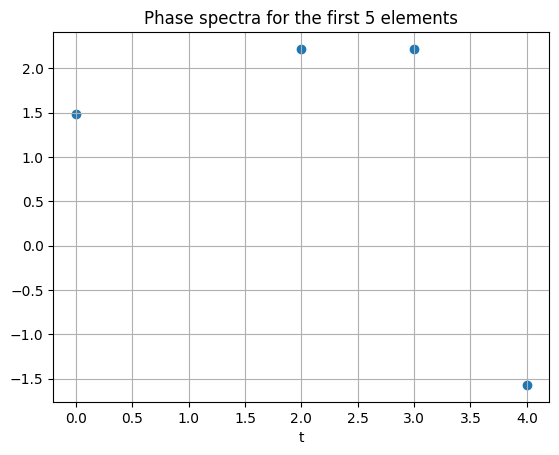

In [23]:
#plotting all curves and points 
plt.title("Phase spectra for the first 5 elements")
plt.grid()
plt.xlabel("t")

#plotting the phase spectra
f_sine = list(map(recursive_sine_fourier, t))
plt.scatter(np.arange(5),phase[:5])
plt.xlim(-0.2,4.2)